Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [3]:
tf.__version__

'2.18.0'

Ignore Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Preprocessing Training Set

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:\Users\johnr\Desktop\Projects\WGU\Capstone\pikachu_dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 774 images belonging to 2 classes.


Preprocessing Test Set

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\johnr\Desktop\Projects\WGU\Capstone\pikachu_dataset\test_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 258 images belonging to 2 classes.


Initializing CNN

In [11]:
cnn = tf.keras.models.Sequential()

Convolution

In [13]:
cnn.add(tf.keras.layers.Input(shape=(64, 64, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

Pooling

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Dropout Layer

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25))

Second Convolution layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

Flattening

In [21]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output Layer

In [25]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling CNN

In [27]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training CNN on Training set and Evaluating on Test Set

In [29]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 741ms/step - accuracy: 0.5599 - loss: 0.9799 - val_accuracy: 0.5078 - val_loss: 0.6558
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 646ms/step - accuracy: 0.6771 - loss: 0.5815 - val_accuracy: 0.6822 - val_loss: 0.5893
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 582ms/step - accuracy: 0.7910 - loss: 0.4553 - val_accuracy: 0.8411 - val_loss: 0.4050
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 584ms/step - accuracy: 0.8500 - loss: 0.3548 - val_accuracy: 0.8411 - val_loss: 0.3654
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.8407 - loss: 0.3714 - val_accuracy: 0.8256 - val_loss: 0.4008
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 628ms/step - accuracy: 0.8455 - loss: 0.3906 - val_accuracy: 0.8450 - val_loss: 0.3675
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 612ms/step - accuracy: 0.8533 - loss: 0.3400 - val_accuracy: 0.8450 - val_loss: 0.3599
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.8602 - loss: 0.3401 - val_accu

Validation Set Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


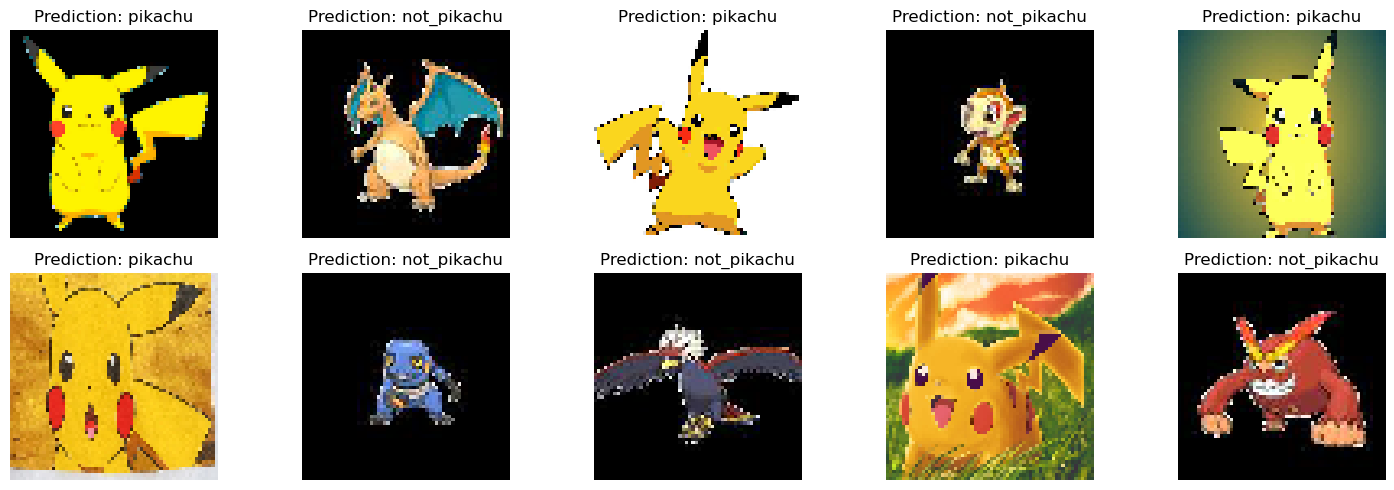

In [31]:
# Loop through images from 1 to 10
plt.figure(figsize=(15, 5))
for i in range(1, 11):
    # Load and preprocess images
    test_image_path = fr"C:\Users\johnr\Desktop\Projects\WGU\Capstone\pikachu_dataset\validation_set\pikachu_or_not({i}).jpg"
    test_image = image.load_img(test_image_path, target_size=(64, 64))
    test_image_array = image.img_to_array(test_image) / 255
    test_image_array = np.expand_dims(test_image_array, axis=0)
    
    # Make Prediction
    result = cnn.predict(test_image_array)
    
    # Interpret prediction
    prediction = 'pikachu' if result[0][0] > 0.5 else 'not_pikachu'
    
    # Display image and prediction
    plt.subplot(2, 5, i)
    plt.imshow(test_image)
    plt.title(f"Prediction: {prediction}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Visualizations

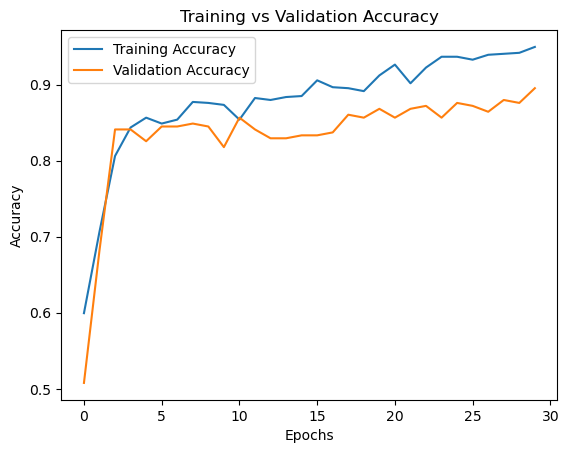

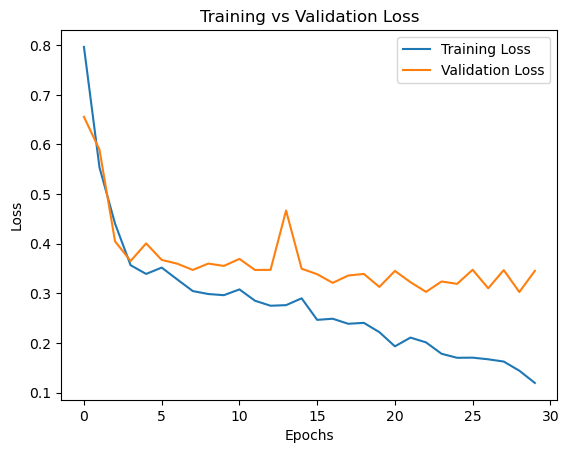

In [33]:
#Graphs

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step


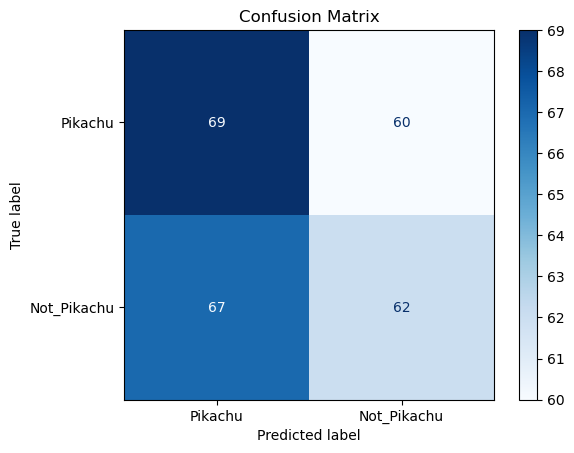

In [34]:
#Confusion Matrix
cnn.evaluate(test_set, verbose=0)  
y_true = test_set.classes
y_pred = cnn.predict(test_set)
y_pred = np.round(y_pred).flatten()

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pikachu', 'Not_Pikachu'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Making a Single Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


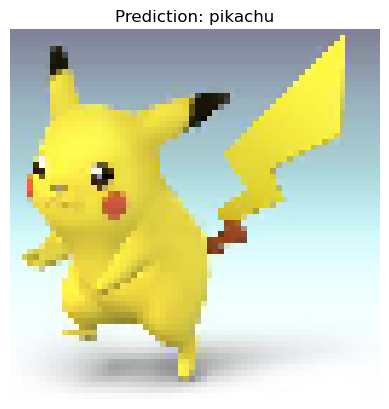

In [36]:
#Load and preprocess image
test_image_path = r"C:\Users\johnr\Desktop\Projects\WGU\Capstone\pikachu_dataset\validation_set\pikachu_or_not(11).jpg"
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)/255
test_image_array = np.expand_dims(test_image_array, axis = 0)

#Make Prediction
result = cnn.predict(test_image_array)
training_set.class_indices

#Interpret
if result[0][0] > 0.5:
    prediction = 'pikachu'
else:
    prediction = 'not_pikachu'

# Display the image with prediction
plt.imshow(np.squeeze(test_image_array))
plt.title(f"Prediction: {prediction}")
plt.axis("off")
plt.show()    